In [28]:
import tensorflow as tf
import h5py
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

from src.models.fetch_data_from_hdf5 import get_tf_data
from src.models.data_augmentation import random_rotate
from src.models.models_2d import classif_model
from src.models.train_model_2d import get_split_patient_lists

In [4]:
clinical_df = pd.read_csv("/home/valentin/python_wkspce/plc_seg/data/clinical_info.csv").set_index("patient_id")

In [19]:
file = h5py.File(
        "/home/valentin/python_wkspce/plc_seg/data/processed/2d_pet_normalized/data.hdf5",
        "r")
patient_list = list(file.keys())
patient_list = [p for p in patient_list if p not in ["PatientLC_63"]]
ids_train, ids_val, ids_test = get_split_patient_lists(clinical_df, patient_list)

In [30]:
ds = get_tf_data(file,patient_list=ids_train, clinical_df=clinical_df, oversample_plc_neg=True, random_angle=45, output_type="segmentation+plc_status", ).batch(32)

In [31]:
x, yp = next(ds.as_numpy_iterator())


In [36]:
yp[1]

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

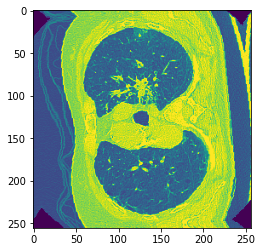

In [33]:
plt.imshow(x[0,:,:, 0])

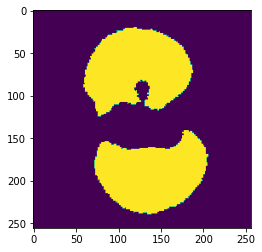

In [35]:
plt.imshow(yp[0][0,:,:,2])